In [22]:
#import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler



In [32]:
#load data

df= pd.read_csv (r'C:\Users\Tombra\Infectious-diseases-in-California\california infectious disease.csv')

In [38]:
df['Percentage'] = df['Cases'] / df['Population'] * 100

In [39]:
df

,Disease,County,Year,Sex,Cases,Population,Lower_95%_CI,Upper_95%_CI,Rate,Percentage
0,Amebiasis,ALAMEDA,2001,FEMALE,7.0,746596,0.377,1.932,0.938*,0.000938
1,Amebiasis,ALAMEDA,2001,MALE,9.0,718968,0.572,2.376,1.252*,0.001252
2,Amebiasis,ALAMEDA,2001,TOTAL,16.0,1465564,0.624,1.773,1.092*,0.001092
3,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,FEMALE,0.0,746596,0.000,0.494,-,0.000000
4,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,MALE,0.0,718968,0.000,0.513,-,0.000000
...,...,...,...,...,...,...,...,...,...,...
151723,Yersiniosis,YUBA,2018,MALE,0.0,38838,0.000,9.498,-,0.000000
151724,Yersiniosis,YUBA,2018,TOTAL,0.0,77494,0.000,4.760,-,0.000000
151725,Zika Virus Infection,YUBA,2018,FEMALE,0.0,38656,0.000,9.542,-,0.000000
151726,Zika Virus Infection,YUBA,2018,MALE,0.0,38838,0.000,9.498,-,0.000000


In [40]:
# Calculate the mean of each column
mean_values = df.mean(numeric_only=True)

# Fill null values with the mean of each column
df_filled = df.fillna(mean_values)

In [41]:
df_filled

,Disease,County,Year,Sex,Cases,Population,Lower_95%_CI,Upper_95%_CI,Rate,Percentage
0,Amebiasis,ALAMEDA,2001,FEMALE,7.0,746596,0.377,1.932,0.938*,0.000938
1,Amebiasis,ALAMEDA,2001,MALE,9.0,718968,0.572,2.376,1.252*,0.001252
2,Amebiasis,ALAMEDA,2001,TOTAL,16.0,1465564,0.624,1.773,1.092*,0.001092
3,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,FEMALE,0.0,746596,0.000,0.494,-,0.000000
4,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,MALE,0.0,718968,0.000,0.513,-,0.000000
...,...,...,...,...,...,...,...,...,...,...
151723,Yersiniosis,YUBA,2018,MALE,0.0,38838,0.000,9.498,-,0.000000
151724,Yersiniosis,YUBA,2018,TOTAL,0.0,77494,0.000,4.760,-,0.000000
151725,Zika Virus Infection,YUBA,2018,FEMALE,0.0,38656,0.000,9.542,-,0.000000
151726,Zika Virus Infection,YUBA,2018,MALE,0.0,38838,0.000,9.498,-,0.000000


In [6]:
# Use boolean indexing to filter out rows with 'Yellow Fever', 'Anthrax', and 'Domoic Acid Poisoning' in the 'Disease' column because they dont have data
filtered_diseases = ['Yellow Fever', 'Anthrax', 'Domoic Acid Poisoning']
df_filtered = df_filled[~df_filled['Disease'].isin(filtered_diseases)]

# Now df_filtered contains the rows without the specified diseases in the 'Disease' column

In [8]:

# Create the linear model
X = df_filtered['Population']  # Independent variable (Population)
y = df_filtered['Cases']       # Dependent variable (Cases)

# Add a constant term to the independent variable for the intercept in the model
X = sm.add_constant(X)

# Fit the linear model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8358.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:08:56   Log-Likelihood:            -7.4398e+05
No. Observations:              144072   AIC:                         1.488e+06
Df Residuals:                  144070   BIC:                         1.488e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2008      0.121      9.922      0.0

In [11]:
#Check if there is multicollinearity between variables

# Create the independent variable matrix (excluding the constant term)
X = df_filtered['Population']

# Add a constant term to the independent variable for the intercept in the model
X = sm.add_constant(X)

# Fit the linear model
model = sm.OLS(df_filtered['Cases'], X).fit()

# Calculate the variance inflation factors (VIFs)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif)


Variance Inflation Factors (VIF):
     Features       VIF
0       const  1.178797
1  Population  1.000000


From the VIF it can be deduced that there is no multicollinearity between the features as the VIF values are well below 5.

In [14]:
#Using the Logistic regression model to interprete the relationship between the population and number of cases from statsmodel

# Create a binary outcome variable for logistic regression
df_filled['Positive_Cases'] = (df_filled['Cases'] > 0).astype(int)

# Create the logistic regression model
X = df_filled['Population']  # Independent variable (Population)
y = df_filled['Positive_Cases']  # Dependent variable (Positive_Cases)

# Add a constant term to the independent variable for the intercept in the model
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.505942
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Positive_Cases   No. Observations:               151728
Model:                          Logit   Df Residuals:                   151726
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 0.03959
Time:                        22:27:03   Log-Likelihood:                -76766.
converged:                       True   LL-Null:                       -79930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5015      0.007   -208.016      0.000      -1.516      -1.487
Population  4.906e-07   7.38e

In [21]:


# Create a binary outcome variable for logistic regression
df_filled['Positive_Cases'] = (df_filled['Cases'] > 0).astype(int)

# Create the logistic regression model
X = df_filled[['Population']]  # Independent variable(s) as a DataFrame
y = df_filled['Positive_Cases']  # Dependent variable (Positive_Cases)

# Initialize and fit the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X, y)

# Print the coefficients and intercept of the model
print("Coefficients:", logit_model.coef_)
print("Intercept:", logit_model.intercept_)


Coefficients: [[-9.26173845e-08]]
Intercept: [-3.95758525e-12]


Normailize data to improve model

In [44]:

# Extract the columns to be normalized
columns_to_normalize = ['Population', 'Percentage', 'Lower_95%_CI', 'Upper_95%_CI']

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Apply the Min-Max scaling to the specified columns
df_filled[columns_to_normalize] = scaler.fit_transform(df_filled[columns_to_normalize])

# Now, the specified columns in df_filled are scaled between 0 and 1


In [45]:


# Create a binary outcome variable for logistic regression
df_filled['Positive_Cases'] = (df_filled['Cases'] > 0).astype(int)

# Create the logistic regression model
X = df_filled[['Population', 'Upper_95%_CI', 'Lower_95%_CI', 'Percentage']]  # Independent variable(s) as a DataFrame
y = df_filled['Positive_Cases']  # Dependent variable (Positive_Cases)

# Initialize and fit the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X, y)

# Print the coefficients and intercept of the model
print("Coefficients:", logit_model.coef_)
print("Intercept:", logit_model.intercept_)


Coefficients: [[  4.06043616 -11.22019989  35.5347838   80.57592444]]
Intercept: [-1.51687952]


ROC AUC: 0.8802654510350499
Accuracy: 0.8258594326689866
F1 Score: 0.3793573240627643
Precision: 0.8772406300923411
Recall: 0.24200557436988643
Confusion Matrix:
[[117231   1130]
 [ 25292   8075]]


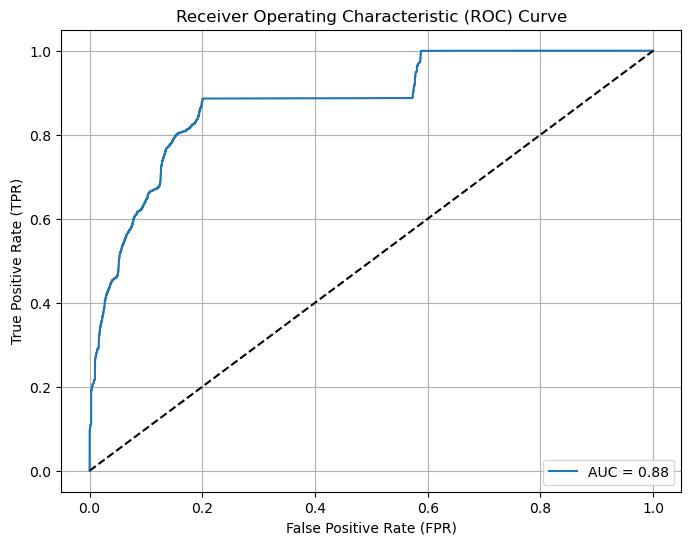

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Assuming your DataFrame is named df_filled
# Create a binary outcome variable for logistic regression
df_filled['Positive_Cases'] = (df_filled['Cases'] > 0).astype(int)

# Create the logistic regression model
X = df_filled[['Population', 'Upper_95%_CI', 'Lower_95%_CI', 'Percentage']]  # Independent variable(s) as a DataFrame
y = df_filled['Positive_Cases']  # Dependent variable (Positive_Cases)

# Initialize and fit the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X, y)

# Make predictions on the test set
y_pred = logit_model.predict(X)

# Calculate probabilities for positive class (class 1)
y_prob = logit_model.predict_proba(X)[:, 1]

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)

# Accuracy
accuracy = accuracy_score(y, y_pred)

# F1 score
f1 = f1_score(y, y_pred)

# Precision
precision = precision_score(y, y_pred)

# Recall
recall = recall_score(y, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Print the results
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
